# Simulação de um modelo Macroeconômico Moderno
Considerando o seguinte modelo dado pelas equações:
\begin{equation}
P_{t} = P^{e} + λ[Y_{t} - Y_{PE}]
\end{equation}
\begin{equation}
Y_{t} = Y_{t-1} + β[m_{s,t} - P_{t}]
\end{equation}
Onde $Y_{t}$ é o produto no tempo $t$, $Y_{t-1}$ é o produto no período anterior, $P_{t}$ é a expectativa de inflação no período $t$, $P^{e}$ é a expectativa de inflação no período anterior, $\beta$ e $λ$ são sensbilidades e $Y_{PE}$ é o produto no ponto de equilíbrio. 

Primeiramente devemos resolver o modelo macro acima, significa encontrar o valor das variáveis endogenas do modelo em função das exogenas e seus parâmetros. 

Resolvendo o modelo encontramos a seguinte equação para $P_{t}$:
\begin{equation}
P_{t} = \frac{P^{e}}{(1+\betaλ)} + \frac{\lambda Y_{t-1}}{(1+\betaλ)} + \frac{\lambda \beta m_{s,t}}{(1+\betaλ)} - \frac{\lambda Y_{PE}}{(1+\betaλ)}
\end{equation}

E a seguinte equação para $Y_{t}$:
\begin{equation}
Y_{t} = \frac{Y_{t-1}}{(1+\betaλ)} + \frac{\beta M_{s,t}}{(1+\betaλ)} - \frac{\beta P_{t-1}}{(1+\betaλ)} + \frac{\lambda \beta Y_{PE}}{(1+\betaλ)}
\end{equation}

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Configurando o plot para ele sair em alta definição 
plt.rcParams['figure.dpi'] = 100

In [ ]:
# Definindo os parâmetros 
pe = 4 
beta = 3 
l = 0.05 
ype = 500 
ms = 4 

In [ ]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,200)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do pt
pt = np.zeros([301,1],float)
# Matriz do y 
yt = np.zeros([301,1],float)

In [ ]:
# Com as matrizes definidas, podemos preencher elas usando loops for 

# Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
for x in range(0,301):                                    
  for i in range(0,300):                                   
    pt[i] = 4                                                                                                                             #Configurando o nosso pt inicial para 4
    pt_novo = np.copy(pt)                                                                                                                 #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,301):                                                                                                                  #Como o zero já esta definido, aqui iniciamos a partir do 1
    pt_novo[i] = (pt[i-1]/(1 + beta*l)) + ((l*yt[i - 1])/(1 + beta*l)) + ((l*beta*ms)/(1 + beta*l)) - ((l*ype)/(1 + beta*l))               #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    pt = np.copy(pt_novo)                                                                                                                 #voltando para a matriz pt
# Loop para definir o y 
 for i in range(0,70):                                   
    yt[i] = 500                                           
    y_novo = np.copy(yt)                                  
  for i in range(1,70):
      y_novo[i] = (yt[i - 1]/(1+(beta*l)))  + (beta*(ms[i])/(1+(beta*l)))  - (beta*pt[i - 1]/(1+(beta*l)))  + ((beta*l)*ype/(1+(beta*l)))                
      yt = np.copy(y_novo)  

In [ ]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
pt = np.array(pt)
yt = np.array(yt)

In [ ]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
pt = np.reshape(pt,301)
yt = np.reshape(yt,301)

In [ ]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_macro = pd.DataFrame(index = Tempo)
data_modelo_macro["Tempo"] = pd.Series(Tempo)
data_modelo_macro["Pt"] = pd.Series(pt)
data_modelo_macro["Yt"] = pd.Series(yt)
data_modelo_macro

,Tempo,Pt,Yt
0,0,4.0,500.0
1,1,4.0,500.0
2,2,4.0,500.0
3,3,4.0,500.0
4,4,4.0,500.0
...,...,...,...
195,195,4.0,500.0
196,196,4.0,500.0
197,197,4.0,500.0
198,198,4.0,500.0


## Como pode ser visto na tabela, o modelo é um modelo de Estado Estacionário. Agora vamos dar choques nele envolvendo política monetária. Isto é, em certo ponto alterar o $m{s,t}$ 



1.   Fazendo $m{s,t} = 5$ a partir do instante $t=2$



In [13]:
# Definindo os parâmetros 
pe = 4 
beta = 3 
l = 0.5 
ype = 500 

In [14]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,70)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do pt
pt = np.zeros([70,1],float)
# Matriz do y 
yt = np.zeros([70,1],float)
# Matriz do Ms 
ms = np.zeros([70,1],float)

In [56]:
# Com as matrizes definidas, podemos preencher elas usando loops for 

# Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
for x in range(0,70):                                    
  for i in range(0,70):                                   
    pt[i] = 4                                                                                                                             #Configurando o nosso pt inicial para 4
    pt_novo = np.copy(pt)                                                                                                                 #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,70):                                                                                                                  #Como o zero já esta definido, aqui iniciamos a partir do 1
    pt_novo[i] = (pt[i-1]/(1 + (beta*l))) + ((l*yt[i - 1])/(1 + (beta*l))) + (((l*beta)*ms[i])/(1 + (beta*l))) - ((l*ype)/(1 + (beta*l)))                #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    pt = np.copy(pt_novo)  
  # Loop para definir o ms
  for i in range(0,1):
    ms[i] = 4
    ms = np.copy(ms)
#fazendo o choque no Ms
  for i in range(1,20):
    ms[i] = 20
    ms = np.copy(ms) 
  for i in range(20,70):
    ms[i] = 3
    ms = np.copy(ms)                                                                                                                #voltando para a matriz pt
# Loop para definir o y 
  for i in range(0,70):                                   
    yt[i] = 500                                           
    y_novo = np.copy(yt)                                  
  for i in range(1,70):
      y_novo[i] = (yt[i - 1]/(1+(beta*l)))  + (beta*(ms[i])/(1+(beta*l)))  - (beta*pt[i - 1]/(1+(beta*l)))  + ((beta*l)*ype/(1+(beta*l)))                
      yt = np.copy(y_novo)                                         

In [57]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
pt = np.array(pt)
yt = np.array(yt)
ms = np.array(ms)

In [58]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
pt = np.reshape(pt,70)
yt = np.reshape(yt,70)
ms = np.reshape(ms,70)

In [59]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_macro = pd.DataFrame(index = Tempo)
data_modelo_macro["Tempo"] = pd.Series(Tempo)
data_modelo_macro["Pt"] = pd.Series(pt)
data_modelo_macro["Yt"] = pd.Series(yt)
data_modelo_macro['Ms'] = pd.Series(ms)
data_modelo_macro

,Tempo,Pt,Yt,Ms
0,0,4.0000,500.0000,4.0
1,1,13.6000,519.2000,20.0
2,2,21.2800,515.3600,20.0
3,3,23.5840,504.6080,20.0
4,4,22.3552,497.5424,20.0
...,...,...,...,...
65,65,3.0000,500.0000,3.0
66,66,3.0000,500.0000,3.0
67,67,3.0000,500.0000,3.0
68,68,3.0000,500.0000,3.0


In [ ]:
pd.set_option('display.max_rows', None)
display(data_modelo_macro)

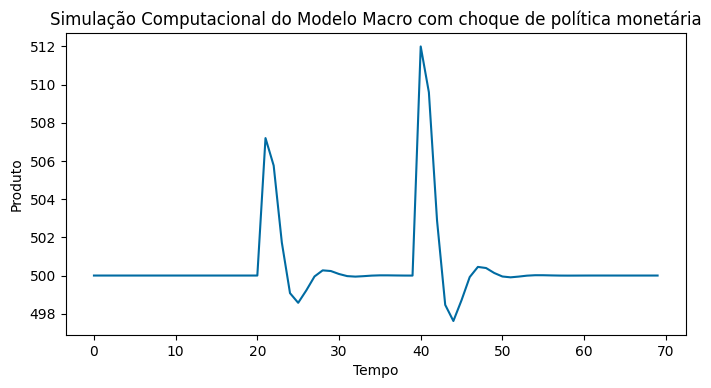

In [24]:
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro['Tempo'],data_modelo_macro['Yt'],color='#006BA2') #Azul
plt.title("Simulação Computacional do Modelo Macro com choque de política monetária", loc='center')
ax.set_ylabel("Produto")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.show()

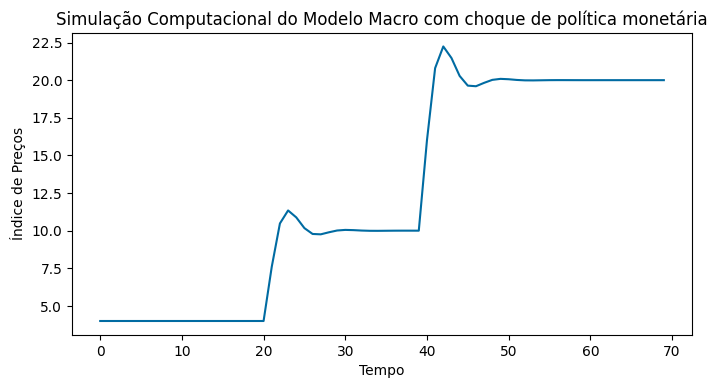

In [25]:
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro['Tempo'],data_modelo_macro['Pt'],color='#006BA2') #Azul
plt.title("Simulação Computacional do Modelo Macro com choque de política monetária", loc='center')
ax.set_ylabel("Índice de Preços")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.show()

## Política Gradualista 

In [36]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,70)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do pt
pt = np.zeros([70,1],float)
# Matriz do y 
yt = np.zeros([70,1],float)
# Matriz do Ms 
ms = np.zeros([70,1],float)

In [49]:
# Com as matrizes definidas, podemos preencher elas usando loops for 
# Definindo os parâmetros 
pe = 4 
beta = 3 
l = 0.5 
ype = 500 
# Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
for x in range(0,70):                                    
  for i in range(0,70):                                   
    pt[i] = 4                                                                                                                             #Configurando o nosso pt inicial para 4
    pt_novo = np.copy(pt)                                                                                                                 #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,70):                                                                                                                  #Como o zero já esta definido, aqui iniciamos a partir do 1
    pt_novo[i] = (pt[i-1]/(1 + (beta*l))) + ((l*yt[i - 1])/(1 + (beta*l))) + (((l*beta)*ms[i])/(1 + (beta*l))) - ((l*ype)/(1 + (beta*l)))                #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    pt = np.copy(pt_novo)  
  # Loop para definir o ms
  for i in range(0,70):
    ms[i] = 4
    ms = np.copy(ms)
#fazendo o choque no Ms
  for i in range(1,20):
    ms[i] = 20
    ms_novo = np.copy(ms)
  for i in range(20,21):
    ms_novo[i] = 19
    ms = np.copy(ms_novo)  
  for i in range(21,22):
    ms_novo[i] = 18
    ms = np.copy(ms_novo)
  for i in range(22,23):
    ms_novo[i] = 17
    ms = np.copy(ms_novo)
  for i in range(23,24):
    ms_novo[i] = 16
    ms = np.copy(ms_novo) 
  for i in range(24,25):
    ms_novo[i] = 15
    ms = np.copy(ms_novo)
  for i in range(25,26):
    ms_novo[i] = 14
    ms = np.copy(ms_novo)
  for i in range(26,27):
    ms_novo[i] = 13
    ms = np.copy(ms_novo)
  for i in range(27,28):
    ms_novo[i] = 12
    ms = np.copy(ms_novo)
  for i in range(28,29):
    ms_novo[i] = 11
    ms = np.copy(ms_novo)
  for i in range(29,30):
    ms_novo[i] = 10
    ms = np.copy(ms_novo)
  for i in range(30,31):
    ms_novo[i] = 9
    ms = np.copy(ms_novo)  
  for i in range(31,32):
    ms_novo[i] = 8
    ms = np.copy(ms_novo)
  for i in range(32,33):
    ms_novo[i] = 7
    ms = np.copy(ms_novo)
  for i in range(33,34):
    ms_novo[i] = 6
    ms = np.copy(ms_novo)
  for i in range(34,35):
    ms_novo[i] = 5
    ms = np.copy(ms_novo) 
  for i in range(35,36):
    ms_novo[i] = 4
    ms = np.copy(ms_novo) 
  for i in range(36,70):
    ms_novo[i] = 3
    ms = np.copy(ms_novo)                                                                                                                          #voltando para a matriz pt
# Loop para definir o y 
  for i in range(0,70):                                   
    yt[i] = 500                                           
    y_novo = np.copy(yt)                                  
  for i in range(1,70):
      y_novo[i] = (yt[i - 1]/(1+(beta*l)))  + (beta*(ms[i])/(1+(beta*l)))  - (beta*pt[i - 1]/(1+(beta*l)))  + ((beta*l)*ype/(1+(beta*l)))                
      yt = np.copy(y_novo)

In [50]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
pt = np.array(pt)
yt = np.array(yt)
ms = np.array(ms)

In [51]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
pt = np.reshape(pt,70)
yt = np.reshape(yt,70)
ms = np.reshape(ms,70)

In [52]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_macro_grad = pd.DataFrame(index = Tempo)
data_modelo_macro_grad["Tempo"] = pd.Series(Tempo)
data_modelo_macro_grad["Pt"] = pd.Series(pt)
data_modelo_macro_grad["Yt"] = pd.Series(yt)
data_modelo_macro_grad['Ms'] = pd.Series(ms)
data_modelo_macro_grad

,Tempo,Pt,Yt,Ms
0,0,4.000000,500.000000,4.0
1,1,13.600000,519.200000,20.0
2,2,21.280000,515.360000,20.0
3,3,23.584000,504.608000,20.0
4,4,22.355200,497.542400,20.0
...,...,...,...,...
65,65,2.999999,499.999997,3.0
66,66,2.999999,500.000000,3.0
67,67,3.000000,500.000001,3.0
68,68,3.000000,500.000001,3.0


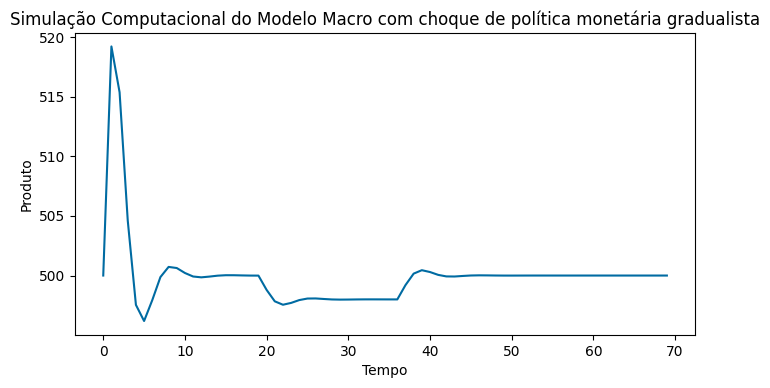

In [53]:
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro_grad['Tempo'],data_modelo_macro_grad['Yt'],color='#006BA2') #Azul
plt.title("Simulação Computacional do Modelo Macro com choque de política monetária gradualista", loc='center')
ax.set_ylabel("Produto")
ax.set_xlabel("Tempo")
plt.savefig('Produto_gradualista.jpg')
plt.grid(False)
plt.show()

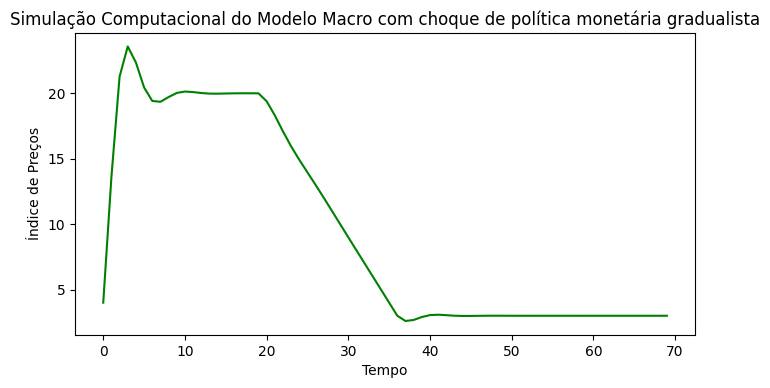

In [147]:
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro_grad['Tempo'],data_modelo_macro_grad['Pt'],color='green') #Azul
plt.title("Simulação Computacional do Modelo Macro com choque de política monetária gradualista", loc='center')
ax.set_ylabel("Índice de Preços")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.savefig('Precos_gradualista.jpg')
plt.show()

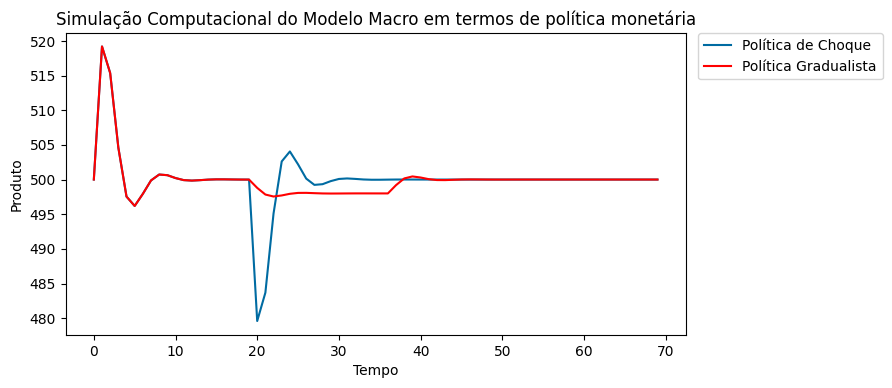

In [60]:
#Plotando os dois gráficos em conjunto 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro['Tempo'],data_modelo_macro['Yt'],color='#006BA2',label = 'Política de Choque') #Azul
ax.plot(data_modelo_macro_grad['Tempo'],data_modelo_macro_grad['Yt'],color='red',label = 'Política Gradualista') #Vermelho
plt.title("Simulação Computacional do Modelo Macro em termos de política monetária", loc='center')
plt.legend(loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Produto")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.show()

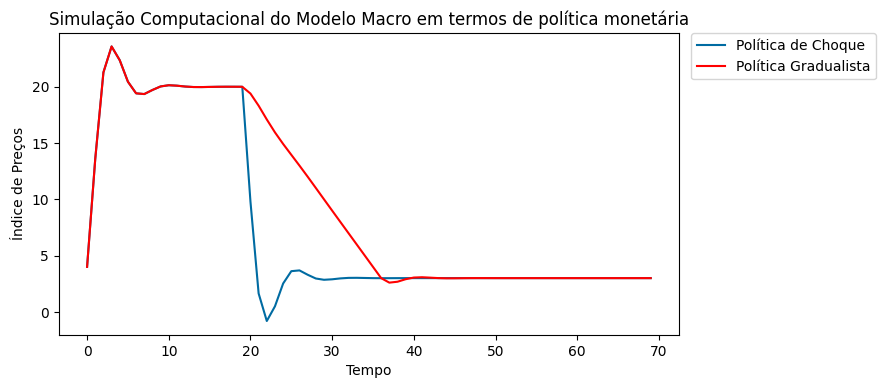

In [75]:
#Índice de Preços 
#Plotando os dois gráficos em conjunto 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro['Tempo'],data_modelo_macro['Pt'],color='#006BA2',label = 'Política de Choque') #Azul
ax.plot(data_modelo_macro_grad['Tempo'],data_modelo_macro_grad['Pt'],color='red',label = 'Política Gradualista') #Vermelho
plt.title("Simulação Computacional do Modelo Macro em termos de política monetária", loc='center')
plt.legend(loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Índice de Preços")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.show()

#Fazendo com o $P^{e}$ sendo igual a $P_{t-2}.$

In [139]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,70)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do pt
pt = np.zeros([70,1],float)
# Matriz do y 
yt = np.zeros([70,1],float)
# Matriz do Ms 
ms = np.zeros([70,1],float)

In [140]:
# Com as matrizes definidas, podemos preencher elas usando loops for 
# Definindo os parâmetros 
pe = 4 
beta = 3 
l = 0.5 
ype = 500 
# Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
for x in range(0,70):                                    
  for i in range(0,70):                                   
    pt[i] = 4                                                                                                                             #Configurando o nosso pt inicial para 4
    pt_novo = np.copy(pt)                                                                                                                 #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,3):                                                                                                                  #Como o zero já esta definido, aqui iniciamos a partir do 1
    pt_novo[i] = (pt[0]/(1 + (beta*l))) + ((l*yt[i - 1])/(1 + (beta*l))) + (((l*beta)*ms[i])/(1 + (beta*l))) - ((l*ype)/(1 + (beta*l)))                #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    pt = np.copy(pt_novo)
  for i in range(3,70):                                                                                                                  #Como o zero já esta definido, aqui iniciamos a partir do 1
    pt_novo[i] = (pt[i-1]/(1 + (beta*l))) + ((l*yt[i - 1])/(1 + (beta*l))) + (((l*beta)*ms[i])/(1 + (beta*l))) - ((l*ype)/(1 + (beta*l)))                #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    pt = np.copy(pt_novo)  
  # Loop para definir o ms
  for i in range(1,20):
    ms[i] = 20 
    ms_novo = np.copy(ms)
#fazendo o choque no Ms
  for i in range(20,70):
    ms_novo[i] = 3
    ms = np.copy(ms_novo)                                                                                                               #voltando para a matriz pt
# Loop para definir o y 
  for i in range(0,70):                                   
    yt[i] = 500                                           
    y_novo = np.copy(yt)                                  
  for i in range(1,70):
      y_novo[i] = (yt[i - 1]/(1+(beta*l)))  + (beta*(ms[i])/(1+(beta*l)))  - (beta*pt[i - 1]/(1+(beta*l)))  + ((beta*l)*ype/(1+(beta*l)))                
      yt = np.copy(y_novo) 

In [141]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
pt = np.array(pt)
yt = np.array(yt)
ms = np.array(ms)

In [142]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
pt = np.reshape(pt,70)
yt = np.reshape(yt,70)
ms = np.reshape(ms,70)

In [143]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_macro_p2 = pd.DataFrame(index = Tempo)
data_modelo_macro_p2["Tempo"] = pd.Series(Tempo)
data_modelo_macro_p2["Pt"] = pd.Series(pt)
data_modelo_macro_p2["Yt"] = pd.Series(yt)
data_modelo_macro_p2['Ms'] = pd.Series(ms)
data_modelo_macro_p2

,Tempo,Pt,Yt,Ms
0,0,4.0000,500.0000,0.0
1,1,13.6000,519.2000,20.0
2,2,17.4400,515.3600,20.0
3,3,22.0480,509.2160,20.0
4,4,22.6624,501.2288,20.0
...,...,...,...,...
65,65,3.0000,500.0000,3.0
66,66,3.0000,500.0000,3.0
67,67,3.0000,500.0000,3.0
68,68,3.0000,500.0000,3.0


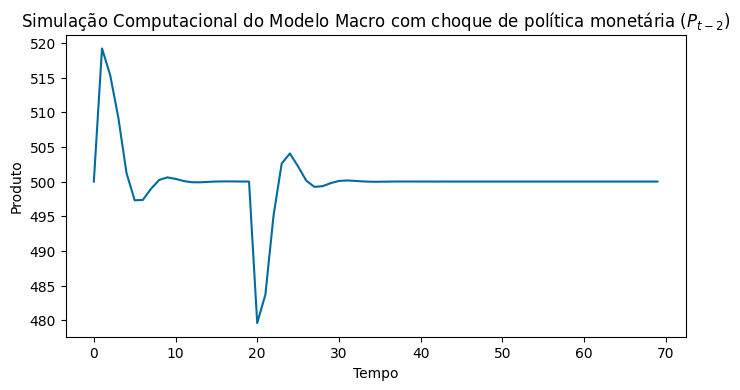

In [144]:
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro_p2['Tempo'],data_modelo_macro_p2['Yt'],color='#006BA2') #Azul
plt.title("Simulação Computacional do Modelo Macro com choque de política monetária ($P_{t-2}$)", loc='center')
ax.set_ylabel("Produto")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.show()

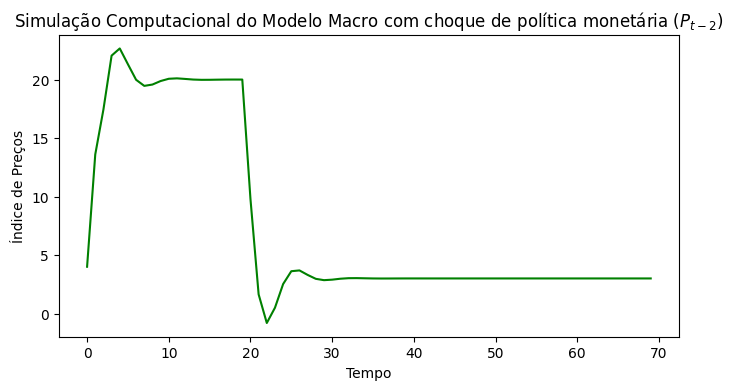

In [146]:
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro_p2['Tempo'],data_modelo_macro_p2['Pt'],color='green') #Azul
plt.title("Simulação Computacional do Modelo Macro com choque de política monetária ($P_{t-2}$)", loc='center')
ax.set_ylabel("Índice de Preços")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.show()

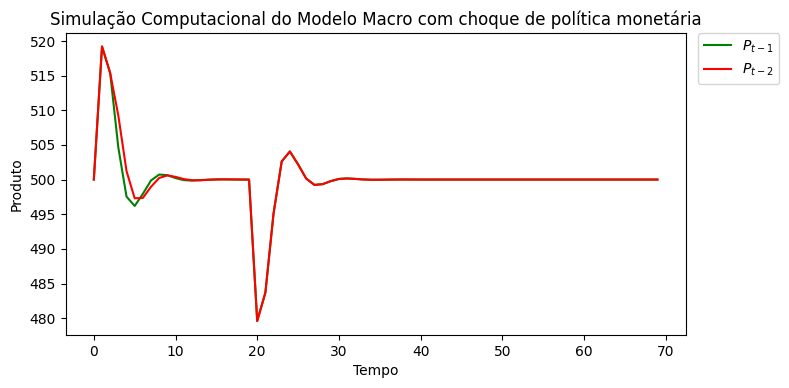

In [125]:
#Gráfico conjunto para as duas economias 
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro['Tempo'],data_modelo_macro['Yt'],color='green',label = "$P_{t-1}$") #Verde
ax.plot(data_modelo_macro_p2['Tempo'],data_modelo_macro_p2['Yt'],color='red',label = "$P_{t-2}$") #Vermelho
plt.title("Simulação Computacional do Modelo Macro com choque de política monetária", loc='center')
ax.set_ylabel("Produto")
ax.set_xlabel("Tempo")
plt.legend(loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.grid(False)
plt.savefig('Produto_P-1_P-2.jpg')
plt.show()

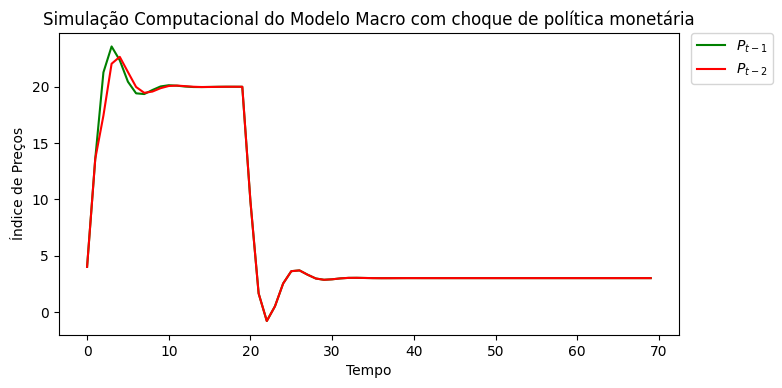

In [126]:
#Gráfico conjunto para as duas economias 
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro['Tempo'],data_modelo_macro['Pt'],color='green',label = "$P_{t-1}$") #Verde
ax.plot(data_modelo_macro_p2['Tempo'],data_modelo_macro_p2['Pt'],color='red',label = "$P_{t-2}$") #Vermelho
plt.title("Simulação Computacional do Modelo Macro com choque de política monetária", loc='center')
ax.set_ylabel("Índice de Preços")
ax.set_xlabel("Tempo")
plt.legend(loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.grid(False)
plt.savefig('IndicePrecos_P-1_P-2.jpg')
plt.show()

# Choque de Política Fiscal

In [129]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,70)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do pt
pt = np.zeros([70,1],float)
# Matriz do y 
yt = np.zeros([70,1],float)
# Matriz do Ms 
ms = np.zeros([70,1],float)

In [130]:
# Com as matrizes definidas, podemos preencher elas usando loops for 
pe = 4 
beta = 3 
l = 0.5 
ype = 500 
alpha = 2
g = 10 
# Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
for x in range(0,70):                                    
  for i in range(0,70):                                   
    pt[i] = 4                                                                                                                             #Configurando o nosso pt inicial para 4
    pt_novo = np.copy(pt)                                                                                                                 #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,70):                                                                                                                  #Como o zero já esta definido, aqui iniciamos a partir do 1
    pt_novo[i] = (pt[i-1]/(1 + (beta*l))) + ((l*yt[i - 1])/(1 + (beta*l))) + (((l*beta)*ms[i])/(1 + (beta*l))) - ((l*ype)/(1 + (beta*l)))                #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    pt = np.copy(pt_novo)  
  # Loop para definir o ms
  for i in range(0,70):
    ms[i] = 4
    ms = np.copy(ms)                                                                                                               #voltando para a matriz pt
# Loop para definir o y 
  for i in range(0,10):                                   
    yt[i] = 500                                           
    y_novo = np.copy(yt)                                  
  for i in range(10,11):
      y_novo[i] = (yt[i - 1]/(1+(beta*l)))  + (beta*(ms[i])/(1+(beta*l)))  - (beta*pt[i - 1]/(1+(beta*l)))  + ((beta*l)*ype/(1+(beta*l)) + (alpha*g)/(1+(beta*l)))                
      yt = np.copy(y_novo)  
  for i in range(11,70):
    y_novo[i] = (yt[i - 1]/(1+(beta*l)))  + (beta*(ms[i])/(1+(beta*l)))  - (beta*pt[i - 1]/(1+(beta*l)))  + ((beta*l)*ype/(1+(beta*l)))                
    yt = np.copy(y_novo) 

In [131]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
pt = np.array(pt)
yt = np.array(yt)
ms = np.array(ms)

In [132]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
pt = np.reshape(pt,70)
yt = np.reshape(yt,70)
ms = np.reshape(ms,70)

In [133]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_macro_g = pd.DataFrame(index = Tempo)
data_modelo_macro_g["Tempo"] = pd.Series(Tempo)
data_modelo_macro_g["Pt"] = pd.Series(pt)
data_modelo_macro_g["Yt"] = pd.Series(yt)
data_modelo_macro_g['Ms'] = pd.Series(ms)
data_modelo_macro_g

,Tempo,Pt,Yt,Ms
0,0,4.0,500.0,4.0
1,1,4.0,500.0,4.0
2,2,4.0,500.0,4.0
3,3,4.0,500.0,4.0
4,4,4.0,500.0,4.0
...,...,...,...,...
65,65,4.0,500.0,4.0
66,66,4.0,500.0,4.0
67,67,4.0,500.0,4.0
68,68,4.0,500.0,4.0


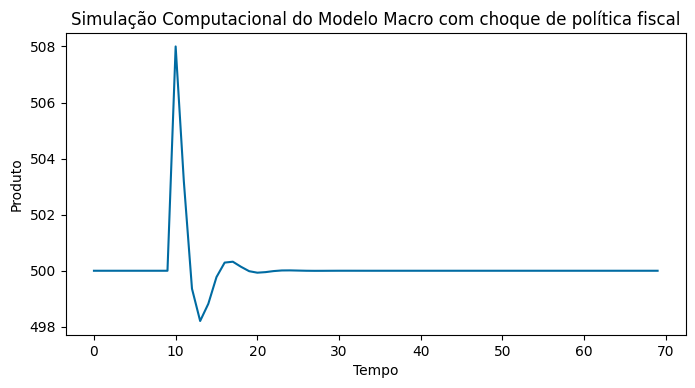

In [134]:
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro_g['Tempo'],data_modelo_macro_g['Yt'],color='#006BA2') #Azul
plt.title("Simulação Computacional do Modelo Macro com choque de política fiscal", loc='center')
ax.set_ylabel("Produto")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.show()

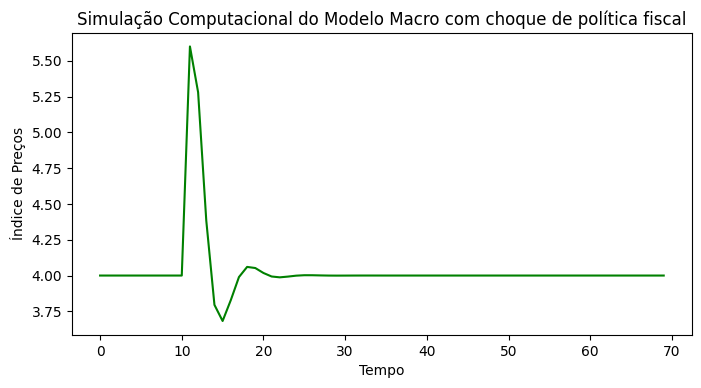

In [136]:
#Fazendo o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(data_modelo_macro_g['Tempo'],data_modelo_macro_g['Pt'],color='green') #Azul
plt.title("Simulação Computacional do Modelo Macro com choque de política fiscal", loc='center')
ax.set_ylabel("Índice de Preços")
ax.set_xlabel("Tempo")
plt.grid(False)
plt.show()